In [1]:
# dados
# importar dados usando o pandas
import pandas as pd

url = "https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-out-20/main/coleta-de-dados/dados_tratados_mercado_livre.csv"

In [2]:
df = pd.read_csv(url)

In [3]:
df.head()

,zonas,enderecos,precos,areas,quartos
0,sul,"Rua Doutor Ferreira Lopes, Vila Sofia, São Pau...",1100.0,90.0,3.0
1,sul,"Avenida Dos Ourives, Jardim São Savério, São P...",1000.0,63.0,3.0
2,sul,"Rua Doutor Nicolau Alberto Defina, Jardim Da S...",1224.0,68.0,2.0
3,sul,"Avenida Carlos Liviero, Vila Liviero, São Paul...",1300.0,48.0,2.0
4,sul,"Rua Armando Ramos Filho, Moinho Velho, São Pau...",830.0,40.0,1.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,960.0,2500.155208,1796.766329,500.0,1354.5,1963.5,2986.25,15000.0
areas,960.0,81.677083,67.986120,13.0,48.0,63.0,87.00,700.0
quartos,958.0,2.049061,0.902044,1.0,1.0,2.0,3.00,8.0


In [5]:
df.dtypes

zonas         object
enderecos     object
precos       float64
areas        float64
quartos      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   zonas      960 non-null    object 
 1   enderecos  960 non-null    object 
 2   precos     960 non-null    float64
 3   areas      960 non-null    float64
 4   quartos    958 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.6+ KB


## Perguntas/hipóteses para os dados
1. Qual/se existe a relação entre preço e número de quartos?
2. Existe e qual é a relação entre preços e zonas (regiões)?
3. Qual a relação entre áreas e preços?
4. Como os dados estão distribuídos
5. Plotar médias dos preços com quartos
6. Outliers e regiões


In [7]:
# plotando com matplotlib
import matplotlib.pyplot as plt

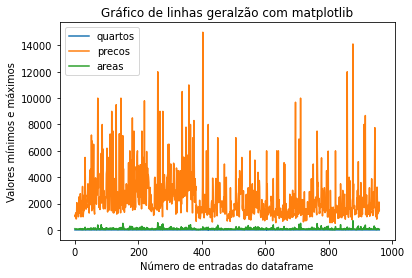

In [22]:
plt.plot(df['quartos'])
plt.plot(df['precos'])
plt.plot(df['areas'])
plt.xlabel('Número de entradas do dataframe')
plt.ylabel('Valores mínimos e máximos')
plt.legend(['quartos', 'precos', 'areas'])
plt.title('Gráfico de linhas geralzão com matplotlib')
plt.show()

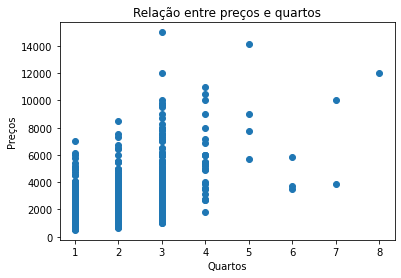

In [27]:
# preco e numero de quartos
plt.scatter(x=df['quartos'], y=df['precos'])
plt.ylabel('Preços')
plt.xlabel('Quartos')
plt.title('Relação entre preços e quartos');

In [33]:
df[df['quartos'] == 8]

,zonas,enderecos,precos,areas,quartos
261,oeste,"Avenida General Cavalcanti De Albuquerque, Jar...",12000.0,550.0,8.0


In [34]:
import seaborn as sns

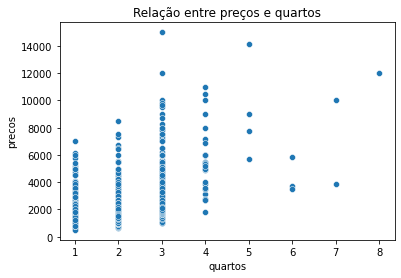

In [37]:
sns.scatterplot(x=df['quartos'], y=df['precos']).set_title('Relação entre preços e quartos');

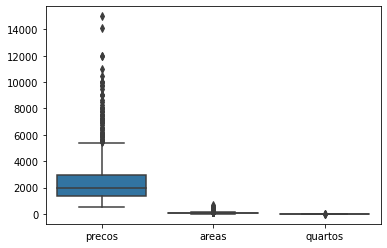

In [39]:
sns.boxplot(data=df);

O Boxplot usa o método do IQR para decidir quais pontos são exceções ou outliers.

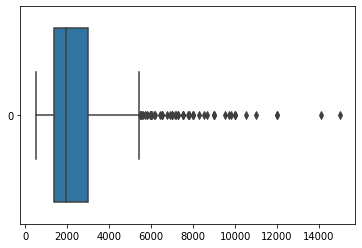

In [45]:
sns.boxplot(data=df['precos'], orient='h');

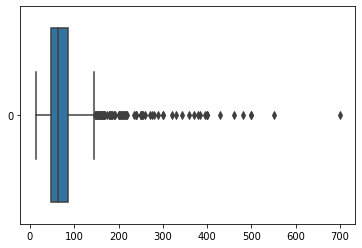

In [44]:
sns.boxplot(data=df['areas'], orient='h');

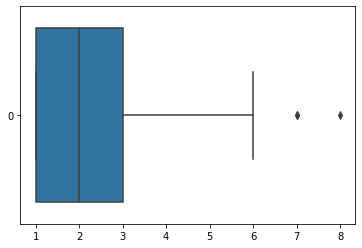

In [43]:
sns.boxplot(data=df['quartos'], orient='h');

O nome dessa distribuição dos preços é enviesada para a direita, em inglês, é right-skewed

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


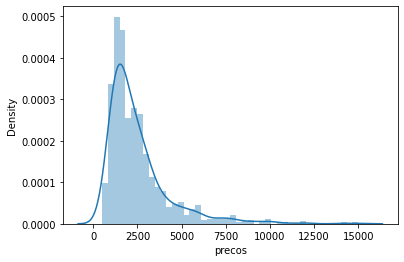

In [50]:
sns.distplot(a=df['precos']); # histograma com curva

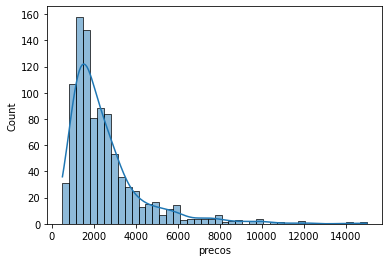

In [52]:
sns.histplot(data=df['precos'], kde=True); # histograma simples

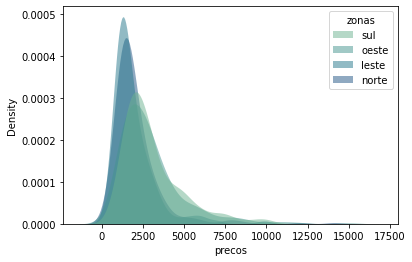

In [56]:
sns.kdeplot(
   data=df, x="precos", hue="zonas",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

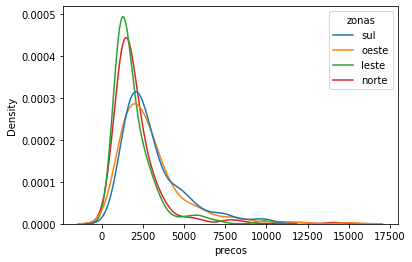

In [61]:
sns.kdeplot(
   data=df, x="precos", hue="zonas",
   fill=False, common_norm=False
);

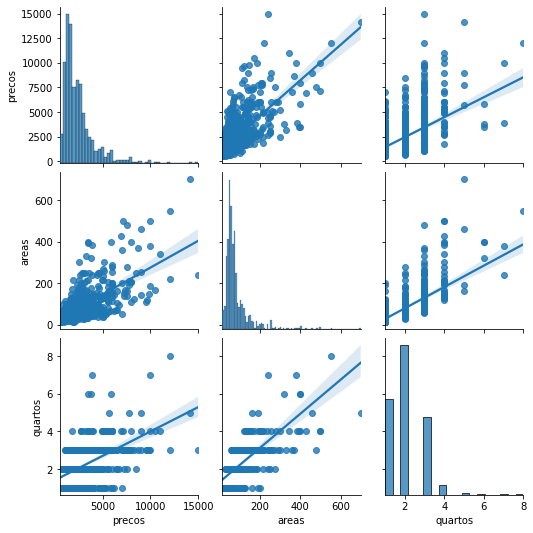

In [65]:
sns.pairplot(data=df, kind='reg');

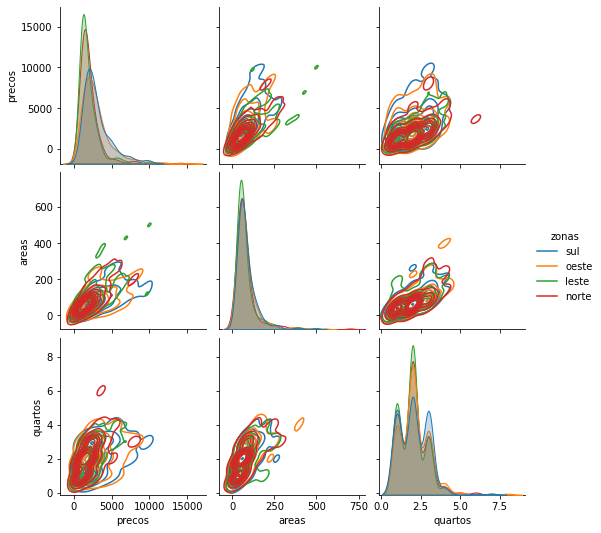

In [66]:
sns.pairplot(data=df, hue='zonas', kind='kde');

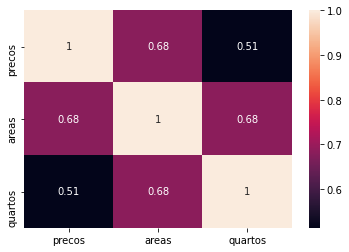

In [70]:
sns.heatmap(data=df.corr(), annot=True); # correlação de pearson

Como os nossos dados não tem uma linearidade, é melhor usarmos o métodos de Spearman do que o de Pearson.

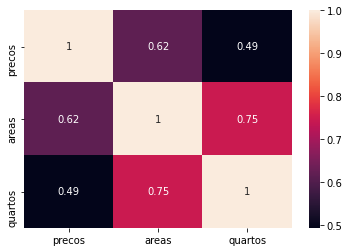

In [81]:
sns.heatmap(data=df.corr(method='spearman'), annot=True); # correlação de spearman

In [75]:
corr_spearman=df.corr(method='spearman')

In [77]:
import numpy as np

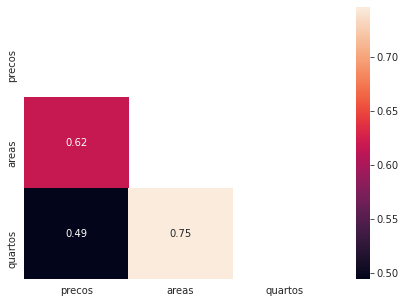

In [87]:
mask = np.zeros_like(corr_spearman)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_spearman, mask=mask, annot=True);
